In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('hetionet-v1.0-nodes.tsv', delimiter='\t')

In [ ]:
df.iloc[:, 2] = df.iloc[:, 2].str.lower()

In [ ]:
X = df.iloc[:, 1]
y = df.iloc[:, 2]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
vec = TfidfVectorizer()
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

In [ ]:
model = LogisticRegression(C=14, max_iter=470)
model.fit(X_train, y_train)

LogisticRegression(C=14, max_iter=470)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

                     precision    recall  f1-score   support

            anatomy       0.70      0.43      0.53        70
 biological process       0.95      0.97      0.96      2245
 cellular component       0.93      0.88      0.91       277
           compound       0.95      0.06      0.11       337
            disease       0.58      0.37      0.45        30
               gene       0.87      1.00      0.93      4247
 molecular function       0.99      0.99      0.99       569
            pathway       0.87      0.70      0.78       348
pharmacologic class       0.94      0.40      0.56        72
        side effect       0.89      0.77      0.82      1126
            symptom       0.29      0.19      0.23        86

           accuracy                           0.90      9407
          macro avg       0.82      0.61      0.66      9407
       weighted avg       0.90      0.90      0.88      9407



In [ ]:
texts = df['name'].tolist()
labels = df['kind'].tolist()

text = "Atorvastatin"

text_features = vec.transform([text])

predicted_entity_name = model.predict(text_features)[0]
predicted_entity_name

'compound'

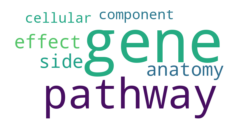

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

prediction_text = "head is the wrist and body and eye but not schizophrenia"

tokens = word_tokenize(prediction_text)

predicted_entities = []
for token in tokens:
    feature_vec = vec.transform([token])
    predicted_entity_name = model.predict(feature_vec)[0]
    predicted_entities.append(predicted_entity_name)

# Join the predicted entities into a single string
entity_string = ' '.join(predicted_entities)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(entity_string)

# Plot the word cloud
plt.figure(figsize=(3, 2))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
